In [2]:
# nbi:hide_in
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, ToggleButtons
import time
plt.rcParams.update({'font.size': 16})

In [12]:
# nbi:hide_in
#core half thinkness in microns
gw_slider = FloatSlider(min=0.6, max=1.4, step=0.2, value=1.0)


#vacuum wavelength in microns
wavelength=1.55
#refractive index of core
n1=3.5
#refractive inex of cladding
n0=3.0


@interact(guide_width=gw_slider)
def plot(guide_width):
    a=guide_width/2
    #value of normalized frequency
    global V
    V=(2*np.pi*a/wavelength)*(n1**2.0-n0**2.0)**0.5
    Ka = np.linspace(0, 8, 200)
    """
    Equation for the Even modes
    plt.plot(Ka, (n0**2/n1**2)*Ka*np.tan(Ka), 'p')

    #Equation for the Odd modes
    plt.plot(Ka, -(n0**2/n1**2)*Ka*(1/np.tan(Ka)), 'p')

    #Equation for the V circle
    plt.plot(Ka, (V**2-Ka**2)**0.5, 'y')

    plt.axis([0, 8, 0, 5])
    plt.yticks([0,1,2,3,4,5,6,7,8])
    plt.xlabel('Kappa x a')
    plt.ylabel('Gamma x a');
    plt.title('blue dots = even modes \n orange dots = odd modes', fontsize=14)
    """
    #Finding the 1st Even Mode
    Ka_arr = np.arange(100,150)/100.0
    Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
    Diff_arr=np.absolute(Diff_arr)
    Ka0 = np.argmin(Diff_arr)/100.0+1.0
    Ga0 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
#    print ('Kappa x a - Even Mode 1 =', Ka0)
#    print ('Gamma x a - Even Mode 1 =', Ga0)
    #Propagation Constant for the 1st Even Mode
    Beta0 = ((n1*(2*np.pi/wavelength))**2-(Ka0/a)**2)**0.5
    effn0 = Beta0*wavelength/2/np.pi
#    print ('Beta - Even Mode 1 =', Beta0, 'micron^-1')
    print('Effective Index = ', effn0)
    
    x0=np.linspace(-2,-a,151) 
    x1=np.linspace(-a,a,101) 
    x2=np.linspace(a,2,151) 
    plt.plot(x0, np.cos(Ka0)*np.exp((a+x0)*(Ga0/a))) 
    plt.plot(x1, np.cos(Ka0*x1/a)) 
    plt.plot(x2, np.cos(Ka0)*np.exp((a-x2)*(Ga0/a))) 
    plt.xlabel('Kappa x a')
    plt.ylabel('Normalized Ey(x)');

interactive(children=(FloatSlider(value=1.0, description='guide_width', max=1.4, min=0.6, step=0.2), Output())…

In [9]:
#Finding the 1st Even Mode
Ka_arr = np.arange(100,150)/100.0
Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
Diff_arr=np.absolute(Diff_arr)
Ka0 = np.argmin(Diff_arr)/100.0+1.0
Ga0 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
print ('Kappa x a - Even Mode 1 =', Ka0)
print ('Gamma x a - Even Mode 1 =', Ga0)

#Finding the 2nd Even mode
Ka_arr = np.arange(300,360)/100.0
Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
Diff_arr=np.absolute(Diff_arr)
Ka2 = np.argmin(Diff_arr)/100.0+3.0
Ga2 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
print ('Kappa x a - Even Mode 2 =', Ka2)
print ('Gamma x a - Even Mode 2 =', Ga2)

#Finding the 1st Odd mode
Ka_arr = np.arange(200,280)/100.0
Diff_arr = -(n0**2/n1**2)*Ka_arr*(1/np.tan(Ka_arr))-(V**2-Ka_arr**2)**0.5
Diff_arr=np.absolute(Diff_arr)
Ka1= np.argmin(Diff_arr)/100.0+2.0
Ga1= -(n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*(1/np.tan(Ka_arr[np.argmin(Diff_arr)]))
print ('Kappa x a - Odd Mode 1 =', Ka1)
print ('Gamma x a - Odd Mode 1 =', Ga1)

Kappa x a - Even Mode 1 = 1.3
Gamma x a - Even Mode 1 = 3.4403753992837025
Kappa x a - Even Mode 2 = 3.51
Gamma x a - Even Mode 2 = 0.9954899768495834
Kappa x a - Odd Mode 1 = 2.5300000000000002
Gamma x a - Odd Mode 1 = 2.6505009461966345


# Calculate the Propagation Constants

In [10]:
#Propagation Constant for the 1st Even Mode
Beta0 = ((n1*(2*np.pi/wavelength))**2-(Ka0/a)**2)**0.5
print ('Beta - Even Mode 1 =', Beta0, 'micron^-1')


#Proparagtion Constant for the 2nd Even Mode
Beta1 = ((n1*(2*np.pi/wavelength))**2-(Ka2/a)**2)**0.5
print ('Beta - Even Mode 2 =', Beta1, 'micron^-1')


#Propagation Constant for the 1st Odd Mode
Beta2 = ((n1*(2*np.pi/wavelength))**2-(Ka1/a)**2)**0.5
print ('Beta - Odd Mode 1 =', Beta2, 'micron^-1')

Beta - Even Mode 1 = 13.94757115654403 micron^-1
Beta - Even Mode 2 = 12.329409603337014 micron^-1
Beta - Odd Mode 1 = 13.25485349473388 micron^-1


## Plot Ey(x) Profile for the 1st Even Mode

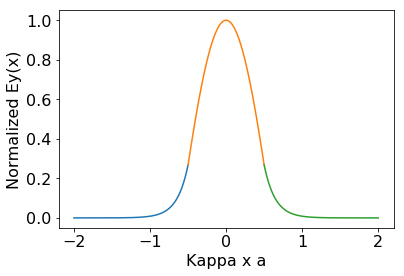

In [11]:
x0=np.linspace(-2,-.5,151) 
x1=np.linspace(-.5,.5,101) 
x2=np.linspace(.5,2,151) 
plt.plot(x0, np.cos(Ka0)*np.exp((.5+x0)*(Ga0/a))) 
plt.plot(x1, np.cos(Ka0*x1/a)) 
plt.plot(x2, np.cos(Ka0)*np.exp((.5-x2)*(Ga0/a))) 
plt.xlabel('Kappa x a')
plt.ylabel('Normalized Ey(x)');

## Plot Ey(x) Profile for the 2nd Even Mode

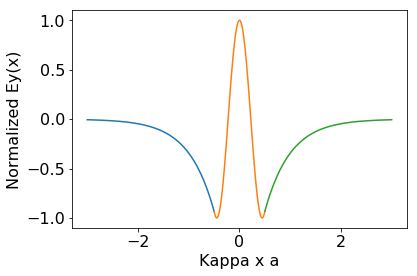

In [12]:
x0=np.linspace(-3,-.5,251)
x1=np.linspace(-.5,.5,101)
x2=np.linspace(.5,3,251)
plt.plot(x0, np.cos(Ka2)*np.exp((.5+x0)*(Ga2/a)))
plt.plot(x1, np.cos(Ka2*x1/a))
plt.plot(x2, np.cos(Ka2)*np.exp((.5-x2)*(Ga2/a)))
plt.xlabel('Kappa x a');
plt.ylabel('Normalized Ey(x)');

# Plot Ey(x) Profile for the Odd Mode

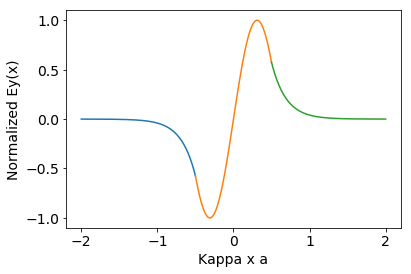

In [9]:
x0=np.linspace(-2,-.5,151)
x1=np.linspace(-.5,.5,101)
x2=np.linspace(.5,2,151)
plt.plot(x0, -np.sin(Ka1)*np.exp((.5+x0)*(Ga1/a)))
plt.plot(x1, np.sin(Ka1*x1/a))
plt.plot(x2, np.sin(Ka1)*np.exp((.5-x2)*(Ga1/a)))
plt.xlabel('Kappa x a')
plt.ylabel('Normalized Ey(x)');